"""
# Visualizing the Impact of Sample Size on Distribution Shapes

This exercise explores how the size of a sample affects the way we see and interpret data distributions, particularly when sampling from a larger population.

---

## Part 1: Comparing Population vs. Sample Distributions

- We plot histograms **with Kernel Density Estimates (KDE)** for both:
  - The entire population (`population_df['Height_cm']`)
  - A simple random sample (`simple_sample_df['Height_cm']`)
- **Purpose:**  
  - To visually assess how closely a sample distribution represents the population.
  - To observe the variability and differences, which are often more pronounced when samples are small.

---

## Part 2: Sampling Distributions with Increasing Sample Sizes

- Draw samples of increasing size from the population (e.g., 5, 15, 25, 35).
- For each sample size, plot a histogram and KDE.
- **Key Points:**
  - Use a **fixed random seed** to ensure results are reproducible.
  - KDE provides a smoothed estimate, aiding normalization and comparison between samples of different sizes.
- **Visual Insights:**
  - **Small samples** tend to have jagged, irregular distributions due to higher random variability.
  - **Larger samples** yield distributions that become smoother and more closely resemble the actual population distribution.

---
"""


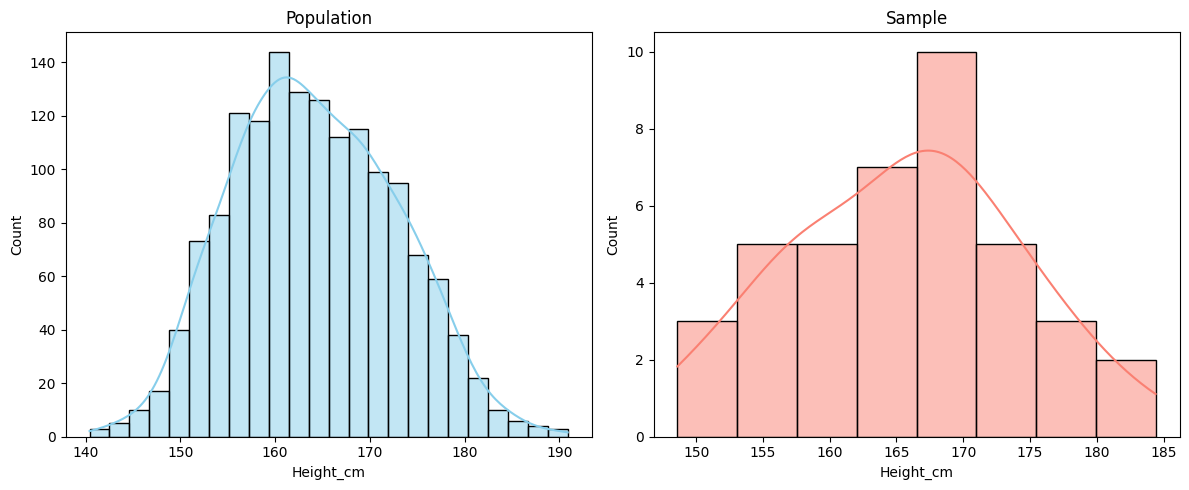

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import random

data = pd.read_excel('assets/day-2-prob-2-a.xlsx')

# Draw side-by-side histograms for Height_cm: population (left) and a sample (right)

plt.figure(figsize=(12,5))

# Population histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Height_cm'], bins=24, color='skyblue', kde=True, stat='count', edgecolor='k')
plt.title('Population')
plt.xlabel('Height_cm')
plt.ylabel('Count')

# Draw a random sample of 40 from the population
sample = data['Height_cm'].sample(n=40, random_state=42)

# Sample histogram
plt.subplot(1, 2, 2)
sns.histplot(sample, bins=8, color='salmon', kde=True, stat='count', edgecolor='k', alpha=0.5)
plt.title('Sample')
plt.xlabel('Height_cm')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


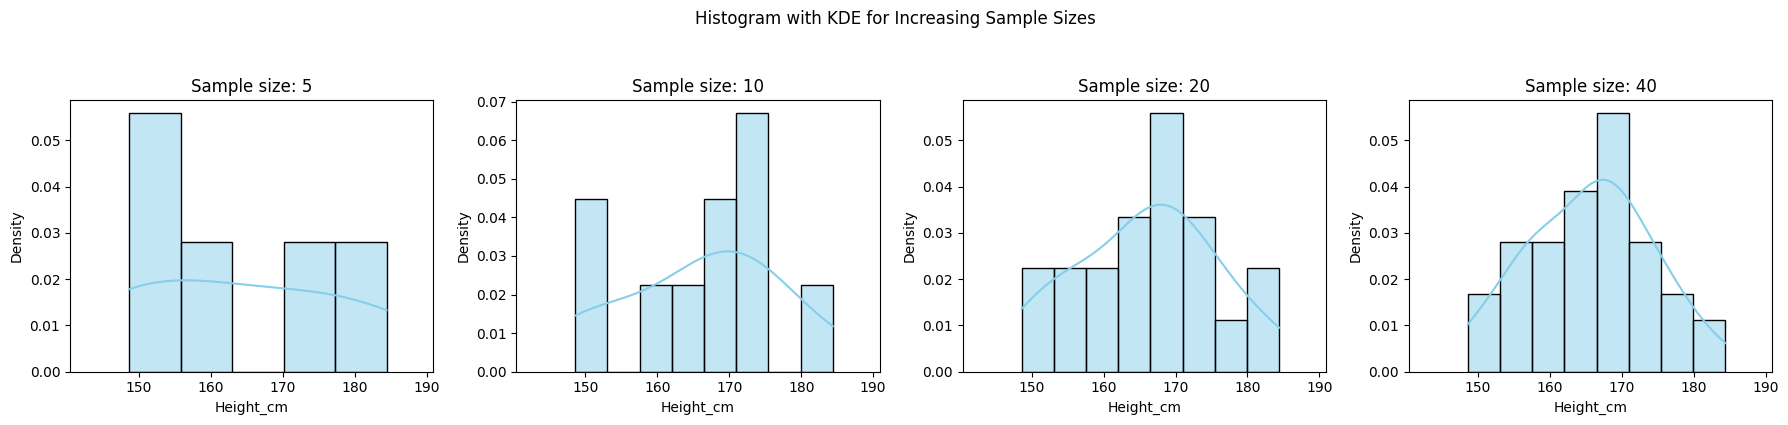

In [3]:
# Draw four side-by-side histograms with KDEs for increasing sample sizes from the population,
# replicating the style of the provided image.

plt.figure(figsize=(18,4))
sample_sizes = [5, 10, 20, 40]

for i, size in enumerate(sample_sizes, 1):
    plt.subplot(1, 4, i)
    sample = data['Height_cm'].sample(n=size, random_state=42) # change random_state so samples are different
    sns.histplot(
        sample, bins=min(8,size), kde=True,
        color='skyblue', edgecolor='k', alpha=0.5, stat='density'
    )
    plt.title(f"Sample size: {size}")
    plt.xlabel('Height_cm')
    plt.ylabel('Density')
    plt.xlim(data['Height_cm'].min(), data['Height_cm'].max())

plt.suptitle("Histogram with KDE for Increasing Sample Sizes", y=1.05)
plt.tight_layout()
plt.show()
